Alireza Jahani
40223044

# Q1

## Q1.2

Shape of features: (1000, 3)
Shape of labels: (1000,)


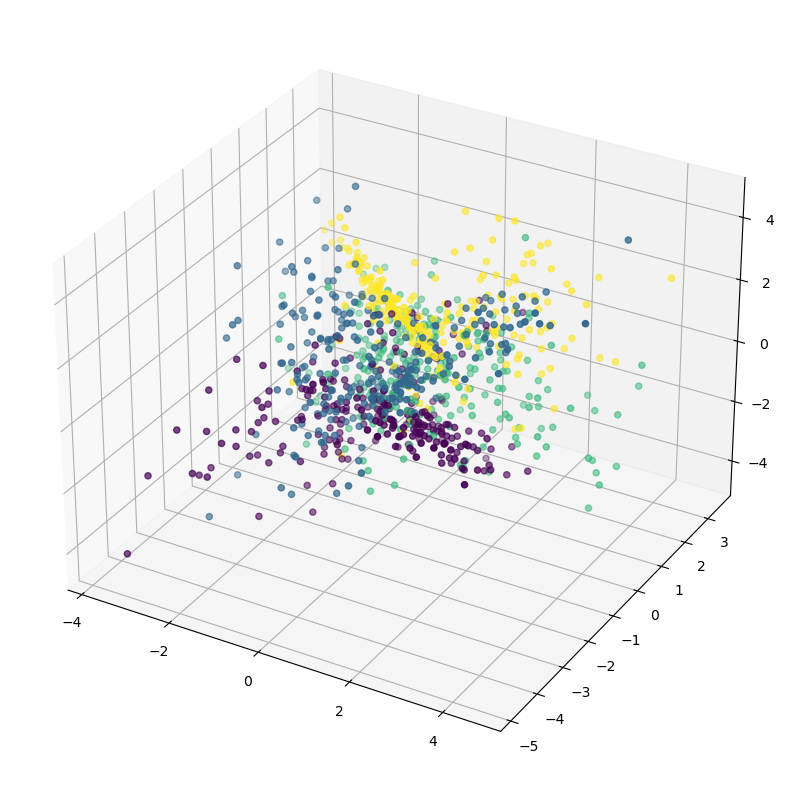

In [15]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColorMap 
X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_classes=4, random_state=44)


print("Shape of features:", X.shape)
print("Shape of labels:", y.shape)
data = pd.DataFrame(np.column_stack((X, y)), columns=['Feature_1', 'Feature_2', 'Feature_3', 'label'])
data.head(10)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(data['Feature_1'], data['Feature_2'], data['Feature_3'], c=data['label'])
plt.show()


## Q1.3

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, random_state=44)
log_reg.fit(X_train_scaled, y_train)

sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate='optimal', random_state=44)
sgd_clf.fit(X_train_scaled, y_train)

print('Accuracy Score for Logistic Reg',accuracy_score(y_test, log_reg.predict(X_test_scaled)))
print(classification_report(y_test, log_reg.predict(X_test_scaled)))

print('Accuracy Score for SGDClassifier',accuracy_score(y_test, sgd_clf.predict(X_test_scaled)))
print(classification_report(y_test, sgd_clf.predict(X_test_scaled)))

Accuracy Score for Logistic Reg 0.63
              precision    recall  f1-score   support

           0       0.46      0.72      0.56        43
           1       0.67      0.54      0.60        52
           2       0.84      0.59      0.70        64
           3       0.64      0.71      0.67        41

    accuracy                           0.63       200
   macro avg       0.65      0.64      0.63       200
weighted avg       0.67      0.63      0.64       200

Accuracy Score for SGDClassifier 0.59
              precision    recall  f1-score   support

           0       0.41      0.72      0.52        43
           1       0.60      0.67      0.64        52
           2       0.82      0.42      0.56        64
           3       0.76      0.61      0.68        41

    accuracy                           0.59       200
   macro avg       0.65      0.61      0.60       200
weighted avg       0.66      0.59      0.59       200



<Axes: >

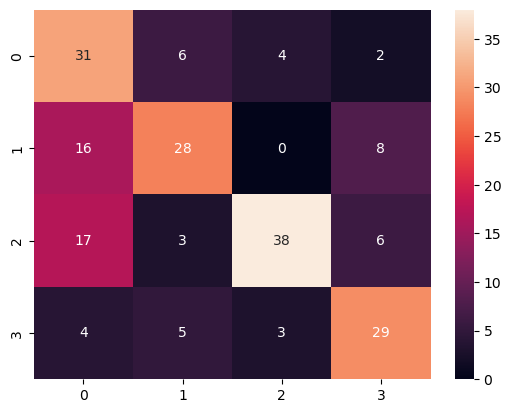

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn
cm_train = confusion_matrix(y_test, log_reg.predict(X_test_scaled))
seaborn.heatmap(cm_train,annot=True,fmt="d")


<Axes: >

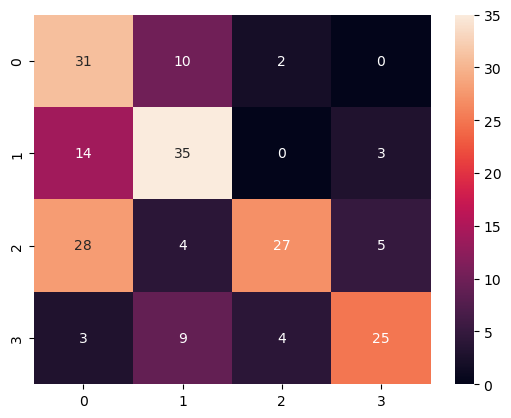

In [27]:
cm_train = confusion_matrix(y_test, sgd_clf.predict(X_test_scaled))
seaborn.heatmap(cm_train,annot=True,fmt="d")

## Q1.4

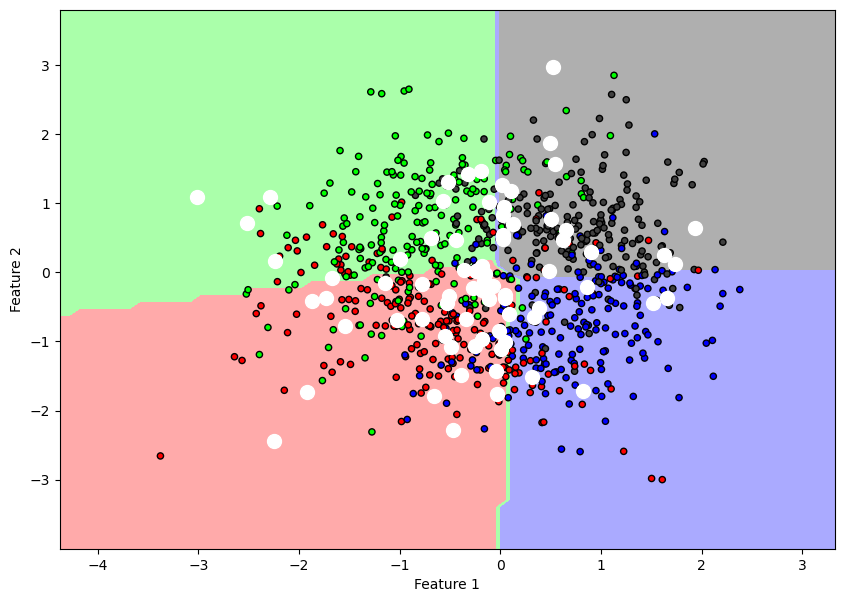

In [47]:

X_train_scaled_2d = X_train_scaled[:, 1:3] 
X_test_scaled_2d = X_test_scaled[:, 1:3]  

log_reg_2d = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, random_state=42)
log_reg_2d.fit(X_train_scaled_2d, y_train)

def plot_decision_boundaries(X, y, classifier, X_test, y_test):

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#404040'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

    y_pred = classifier.predict(X_test)
    incorrect = y_test != y_pred
    plt.scatter(X_test[incorrect, 0], X_test[incorrect, 1], edgecolor='white', facecolor='white', s=100)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plot_decision_boundaries(X_train_scaled_2d, y_train, log_reg_2d, X_test_scaled_2d, y_test)


## Q1.5

In [31]:
from drawdata import ScatterWidget

widget = ScatterWidget()
widget

ScatterWidget()

In [37]:
widget.data

# Get the drawn data as a dataframe
widget.data_as_pandas
widget.data_as_polars

x,y,color,label
f64,f64,str,str
205.247791,408.507795,"""#1f77b4""","""a"""
204.592047,404.46009,"""#1f77b4""","""a"""
206.86092,402.183266,"""#1f77b4""","""a"""
201.938979,402.877401,"""#1f77b4""","""a"""
207.60051,399.440956,"""#1f77b4""","""a"""
…,…,…,…
721.89785,55.034842,"""#d62728""","""d"""
720.316494,55.916238,"""#d62728""","""d"""
766.403953,51.225371,"""#d62728""","""d"""


In [39]:
df = widget.data_as_pandas
df['label'].value_counts()

label
d    1047
b    1038
a    1033
c    1024
Name: count, dtype: int64

In [65]:
X = df[['x','y']]
y = df['label']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
y

array([0, 0, 0, ..., 3, 3, 3])

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.colors import ListedColormap

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, random_state=44)
log_reg.fit(X_train_scaled, y_train)

sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, learning_rate='optimal', random_state=44)
sgd_clf.fit(X_train_scaled, y_train)

print('Accuracy Score for Logistic Reg',accuracy_score(y_test, log_reg.predict(X_test_scaled)))
print(classification_report(y_test, log_reg.predict(X_test_scaled)))

print('Accuracy Score for SGDClassifier',accuracy_score(y_test, sgd_clf.predict(X_test_scaled)))
print(classification_report(y_test, sgd_clf.predict(X_test_scaled)))

Accuracy Score for Logistic Reg 0.9143546441495778
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       189
           1       0.90      0.89      0.89       223
           2       0.91      0.93      0.92       207
           3       1.00      1.00      1.00       210

    accuracy                           0.91       829
   macro avg       0.91      0.91      0.91       829
weighted avg       0.91      0.91      0.91       829

Accuracy Score for SGDClassifier 0.9083232810615199
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       189
           1       0.87      0.93      0.90       223
           2       0.94      0.89      0.92       207
           3       1.00      1.00      1.00       210

    accuracy                           0.91       829
   macro avg       0.91      0.91      0.91       829
weighted avg       0.91      0.91      0.91       829



<Axes: >

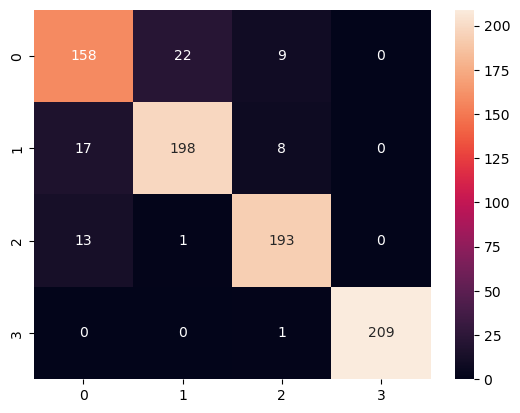

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn
cm_train = confusion_matrix(y_test, log_reg.predict(X_test_scaled))
seaborn.heatmap(cm_train,annot=True,fmt="d")


<Axes: >

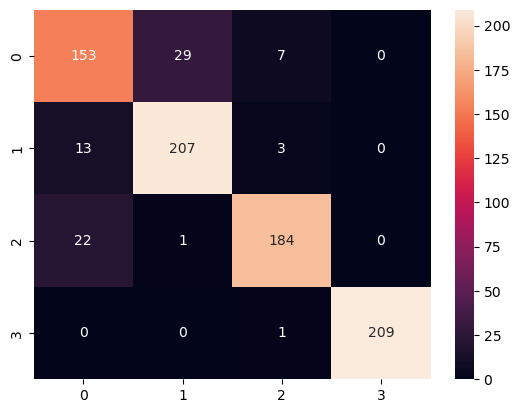

In [68]:
cm_train = confusion_matrix(y_test, sgd_clf.predict(X_test_scaled))
seaborn.heatmap(cm_train,annot=True,fmt="d")

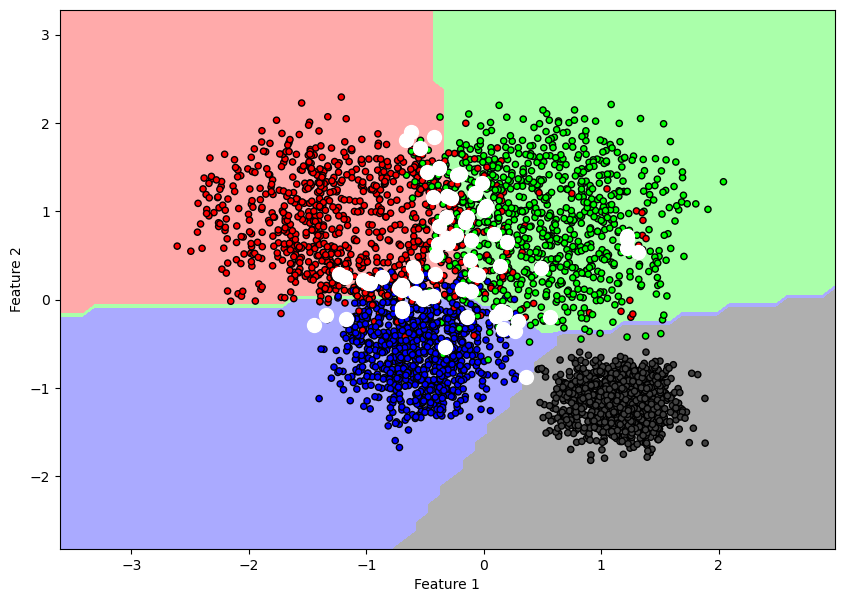

In [69]:


log_reg_2d = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, random_state=42)
log_reg_2d.fit(X_train_scaled, y_train)

def plot_decision_boundaries(X, y, classifier, X_test, y_test):

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#404040'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

    y_pred = classifier.predict(X_test)
    incorrect = y_test != y_pred
    plt.scatter(X_test[incorrect, 0], X_test[incorrect, 1], edgecolor='white', facecolor='white', s=100)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plot_decision_boundaries(X_train_scaled, y_train, log_reg_2d, X_test_scaled, y_test)


# Q2

## Q2.2

In [ ]:
! gdown 1UFQd10CxgJzmgp8Xtd9gxzMnqIrEEheX
!unrar x -Y "ML_HW1_datas.rar" "/content/"

In [1]:
import scipy.io
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn

data = scipy.io.loadmat('ML_HW1_datas/97.mat')
a = data['X097_DE_time'].flatten()
b = data['X097_FE_time'].flatten()
df1 = pd.DataFrame({'X097_DE_time': a})

data = scipy.io.loadmat('ML_HW1_datas/105.mat')
a = data['X105_DE_time'].flatten()

df2 = pd.DataFrame({'X105_DE_time': a})


In [2]:
M = 200
N = 100
data = []
for i in range (1,M):
    data.append(df1['X097_DE_time'].sample(n=N, replace=True, random_state=i).to_list())
df1 = pd.DataFrame(data)
df1['label']=0
print(df1.shape)
data = []
for i in range (1,M):
    data.append(df2['X105_DE_time'].sample(n=N, replace=True, random_state=i).to_list())
df2 = pd.DataFrame(data)
df2['label']=1
print(df2.shape)
df = pd.DataFrame()
df = pd.concat([df1,df2], axis = 0)
df = df.drop_duplicates().reset_index(drop=True)
df

(199, 101)
(199, 101)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-0.040054,-0.000834,-0.001252,0.033378,-0.022530,0.044435,-0.114530,0.039846,0.134140,0.141024,...,-0.004381,0.004590,0.067591,0.034630,-0.002086,0.057578,0.114947,0.011891,-0.110983,0
1,-0.037968,0.099718,-0.101178,0.058412,-0.057161,0.034839,0.068009,0.137269,0.064462,-0.073850,...,0.022530,0.084072,0.020862,0.119745,-0.067591,0.035673,0.001669,0.016063,0.132471,0
2,-0.037342,0.070303,0.094503,0.065297,0.115573,0.002921,0.025660,0.007510,0.022739,0.074267,...,0.100135,0.089913,0.085324,-0.002086,0.099301,0.061124,0.068426,0.022322,0.107646,0
3,0.054866,-0.162094,0.065088,-0.090539,-0.004590,0.078231,0.096380,-0.090122,-0.019610,0.088870,...,0.060081,0.044435,0.162094,-0.099718,-0.053823,0.108480,0.021070,-0.017106,-0.015438,0
4,0.051528,0.135600,0.034213,-0.031292,0.003964,0.079274,0.021279,0.172316,0.174194,0.102222,...,-0.074684,-0.016481,0.105559,0.076562,0.052362,-0.026286,-0.103056,0.113070,0.071972,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.012020,0.014457,0.234394,-0.642918,0.139044,0.039309,0.202557,0.687913,-0.135796,0.129298,...,0.631385,0.076345,-0.323083,0.404301,-0.002437,0.230983,0.014294,0.274028,-0.263957,1
394,0.175105,-0.063025,-0.055228,0.807465,0.213277,0.066274,0.065136,0.101035,-0.244952,-0.526290,...,0.317236,0.102009,0.983870,-0.140831,0.725435,0.232282,0.079593,0.082517,-0.079431,1
395,-0.152039,0.131735,-0.110781,0.296931,0.069197,0.450757,-0.149278,0.017705,-0.134334,0.009584,...,-0.083004,0.073746,-0.090476,-0.239105,0.216688,0.030213,-0.139857,-0.054253,0.208892,1
396,-0.095349,0.012020,0.148791,0.116466,0.056203,0.377337,0.010558,-0.052791,0.023391,-0.396504,...,0.194760,0.067086,0.844013,0.030538,-0.027614,-0.229521,-0.091451,-0.413397,0.134334,1


In [6]:
df['label'].value_counts()

label
0    199
1    199
Name: count, dtype: int64

In [7]:
import pandas as pd
import numpy as np

def calculate_peak(data):
    return np.max(data)

def calculate_crest_factor(data):
    peak = np.max(data)
    rms = np.sqrt(np.mean(np.square(data)))
    return peak / rms

def calculate_clearance_factor(data):
    peak = np.max(data)
    mean = np.mean(data)
    return peak / mean

def calculate_square_mean_root(data):
    return np.sqrt(np.mean(np.square(data)))

def calculate_absolute_mean(data):
    return np.mean(np.abs(data))
def calculate_root_mean_square(data):
    return np.sqrt(np.mean(np.square(data)))
def calculate_impact_factor(peak, rms):
    return peak / rms
datas = []
for index, row in df.iterrows(): 
    label = row['label']
    data = row.iloc[:-1]
    dat=[]
    rms = calculate_root_mean_square(data)
    peak = calculate_peak(data)
    dat.append(np.std(data))
    dat.append(calculate_peak(data))
    dat.append(calculate_crest_factor(data))
    dat.append(calculate_clearance_factor(data))
    dat.append(calculate_square_mean_root(data))
    dat.append(np.mean(data))
    dat.append(calculate_absolute_mean(data))
    dat.append(calculate_impact_factor(peak, rms))

    datas.append(dat)
statistics_df = pd.DataFrame(datas)
statistics_df['label'] = df['label']
statistics_df = statistics_df.rename(columns={0:'std',1:'peak',2:'crest',3:'clearance',4:'smr',5:'mean',6:'absolute_mean',7:'impact_factor'})
statistics_df

,std,peak,crest,clearance,smr,mean,absolute_mean,impact_factor,label
0,0.065845,0.190049,2.678863,7.196461,0.070944,0.026409,0.055339,2.678863,0
1,0.073314,0.221758,2.907109,10.524752,0.076281,0.021070,0.061763,2.907109,0
2,0.071386,0.183790,2.482838,9.384320,0.074024,0.019585,0.060720,2.482838,0
3,0.070100,0.162094,2.299034,21.464088,0.070505,0.007552,0.058817,2.299034,0
4,0.064244,0.174194,2.376593,4.937031,0.073296,0.035283,0.060288,2.376593,0
...,...,...,...,...,...,...,...,...,...
393,0.282370,0.867566,3.065737,46.415226,0.282988,0.018691,0.205846,3.065737,1
394,0.304369,0.983870,3.216921,32.813262,0.305842,0.029984,0.209913,3.216921,1
395,0.310889,0.997189,3.167383,20.079809,0.314831,0.049661,0.230159,3.167383,1
396,0.303002,1.422769,4.694959,-288.980534,0.303042,-0.004923,0.203124,4.694959,1


In [8]:
statistics_df.to_csv(r'Q2.csv',index = False)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(statistics_df.iloc[:,:-1], statistics_df['label'], test_size=0.2, random_state=44, shuffle=True)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Q2.3

(1.0, 1.0)

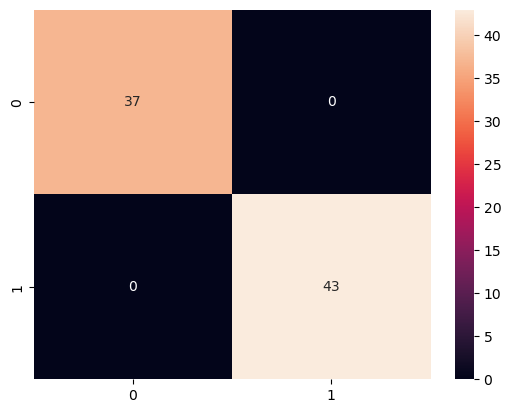

In [16]:
class PerceptronWithLogisticLoss():
    def __init__(self):
        self.weights = None
        self.bias = None
        self.loss_history = []
    def activation_function(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, y, y_hat):
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    def fit(self, X, y, epochs=1000, lr=0.01):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(epochs):
            linear_output = np.dot(X, self.weights) + self.bias
            y_hat = self.activation_function(linear_output)
            error = y_hat - y
            self.weights -= lr * np.dot(X.T, error) / n_samples
            self.bias -= lr * np.mean(error)
            self.loss_history.append(self.loss(y, y_hat))

    def predict(self, X, threshold=0.5):
        linear_output = np.dot(X, self.weights) + self.bias
        y_hat_prob = self.activation_function(linear_output)
        return np.where(y_hat_prob >= threshold, 1, 0)
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        precision = np.sum((y_pred == 1) & (y == 1)) / np.sum(y_pred == 1)
        recall = np.sum((y_pred == 1) & (y == 1)) / np.sum(y == 1)
        f1_score = 2 * (precision * recall) / (precision + recall)
        cm_train = confusion_matrix(y, y_pred)
        seaborn.heatmap(cm_train,annot=True,fmt="d")

        
        return accuracy, f1_score
model_with_logistic_loss = PerceptronWithLogisticLoss()
model_with_logistic_loss.fit(X_train, y_train)

evaluation_metrics_logistic_loss = model_with_logistic_loss.evaluate(X_test, y_test)
evaluation_metrics_logistic_loss


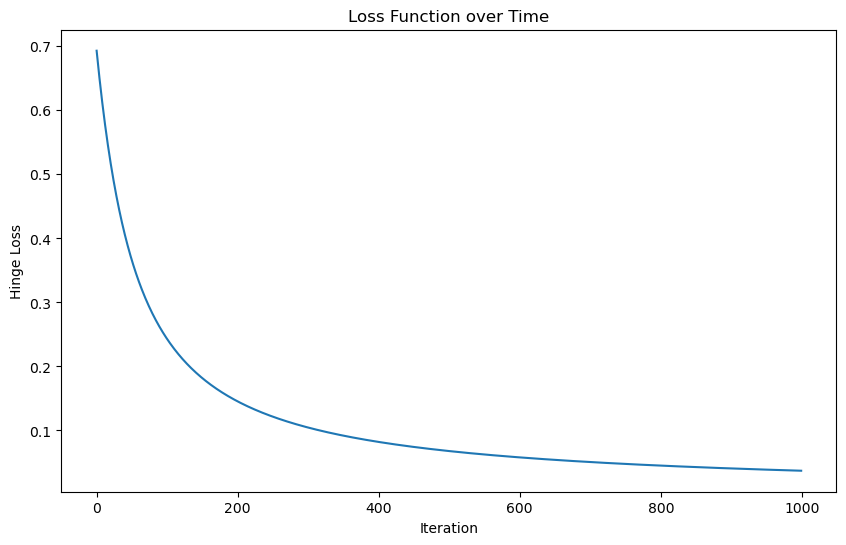

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(model_with_logistic_loss.loss_history)
plt.title('Loss Function over Time')
plt.xlabel('Iteration')
plt.ylabel('Hinge Loss')
plt.show()

## Q2.4

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss='log_loss', max_iter=100, tol=1e-3, learning_rate='constant', eta0=0.01)
sgd_model.fit(X_train, y_train)

y_pred_logistic = sgd_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_logistic)
f1_score = f1_score(y_test, y_pred_logistic)


accuracy, f1_score


(1.0, 1.0)

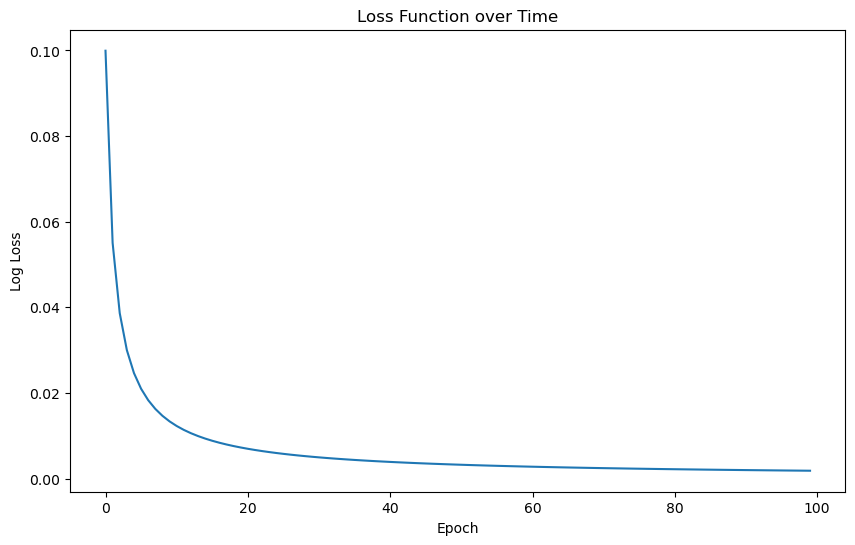

In [25]:
sgd_model = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, learning_rate='constant', eta0=0.01)

loss_values = []
for _ in range(100):  
    sgd_model.partial_fit(X_train, y_train, classes=np.unique(y_train))
    predictions = sgd_model.predict_proba(X_train)
    loss = -np.mean(y_train * np.log(predictions[:, 1]) + (1 - y_train) * np.log(1 - predictions[:, 1]))
    loss_values.append(loss)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(loss_values)
plt.title('Loss Function over Time')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.show()

# Q3

## Q3.1

In [ ]:
! gdown 1UFQd10CxgJzmgp8Xtd9gxzMnqIrEEheX
!unrar x -Y "ML_HW1_datas.rar" "/content/"

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r'ML_HW1_datas/weatherHistory.csv')
del df['Formatted Date']
le = LabelEncoder()
le.fit(df['Summary'])
df['Summary'] = le.transform(df['Summary'])
le.fit(df['Precip Type'])
df['Precip Type'] = le.transform(df['Precip Type'])
le.fit(df['Daily Summary'])
df['Daily Summary'] = le.transform(df['Daily Summary'])

df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,197
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,197
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,197
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,197
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,197
...,...,...,...,...,...,...,...,...,...,...,...
96448,19,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,170
96449,19,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,170
96450,19,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,170
96451,19,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,170


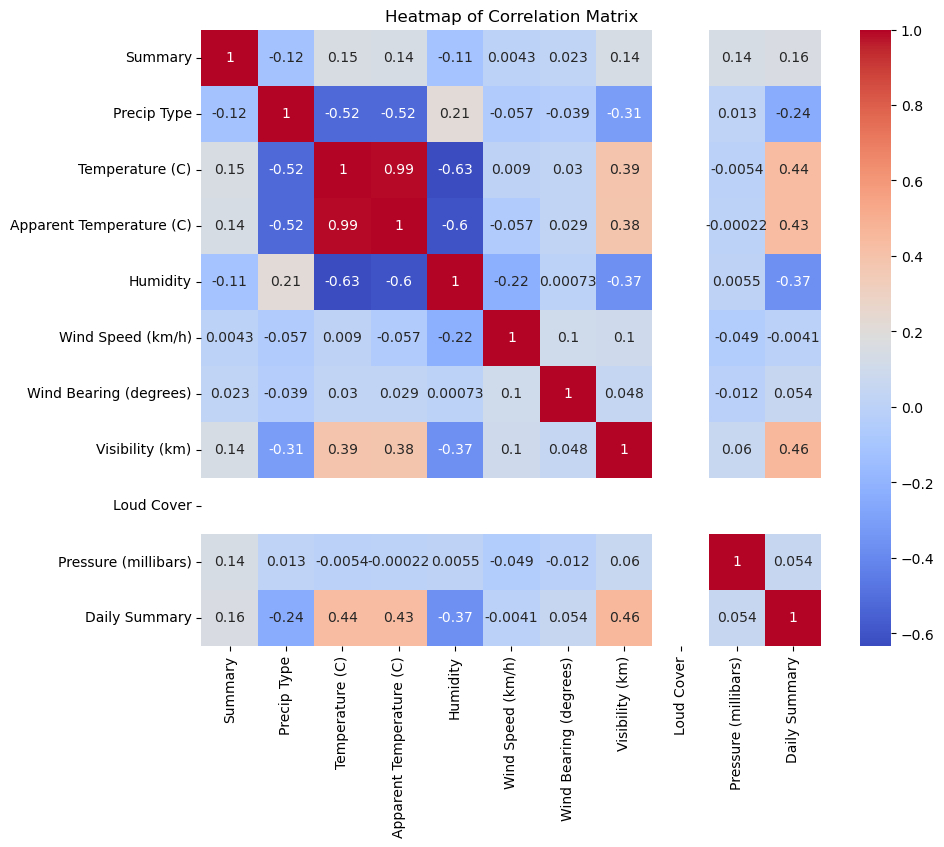

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

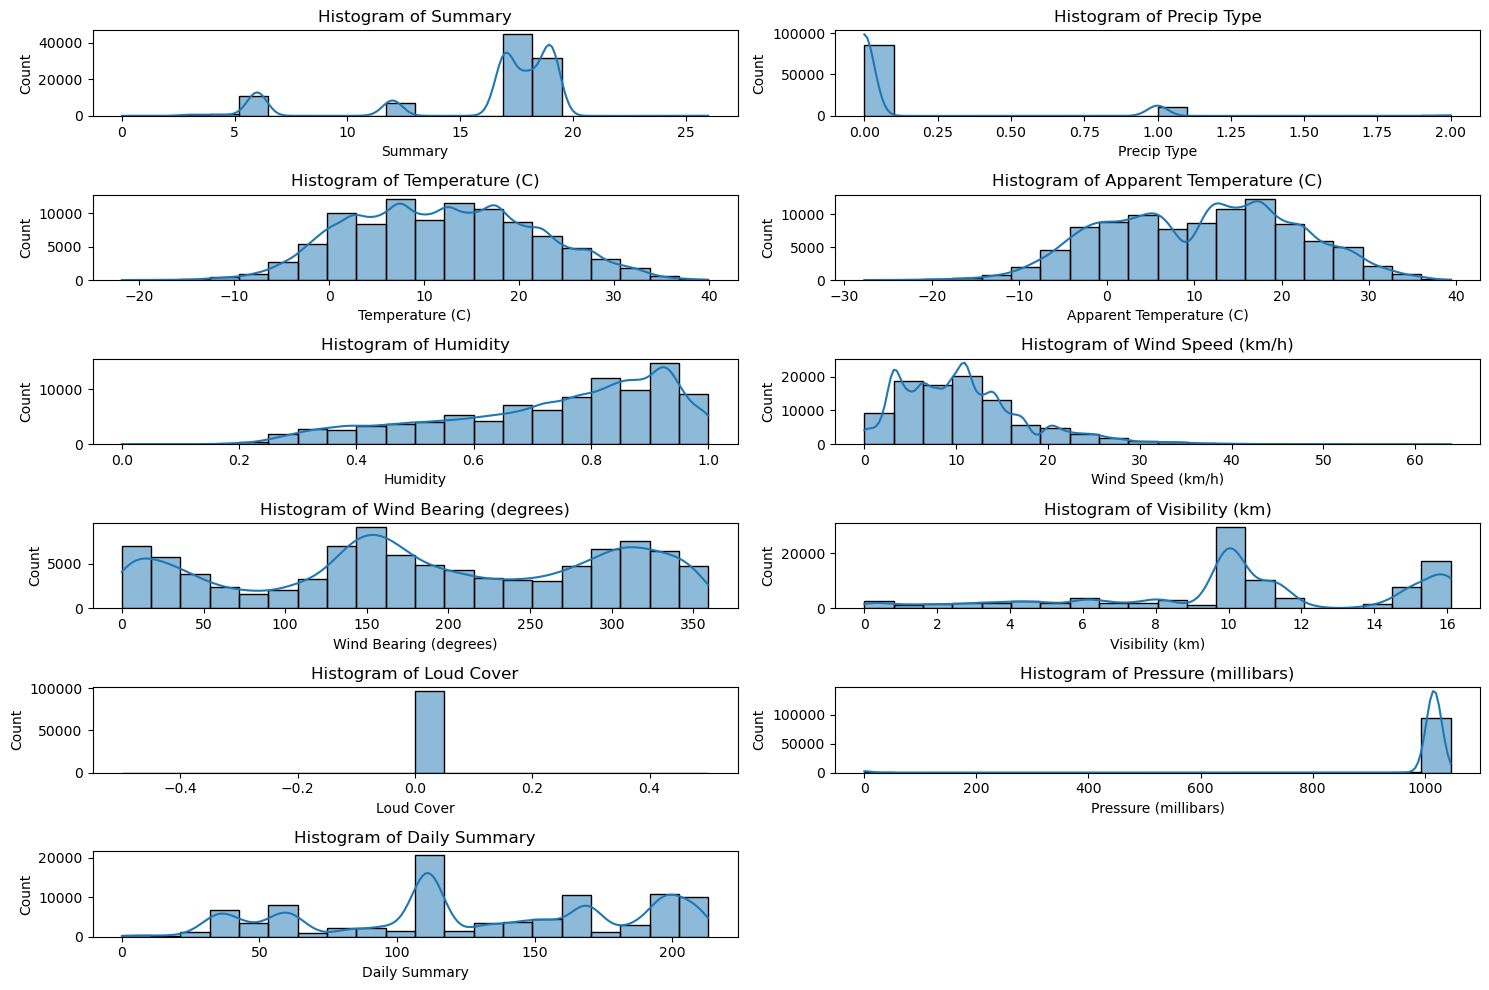

In [20]:
# Generate histograms for each feature
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns, 1):
    plt.subplot(6, 2, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()


## Q3.2

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
# Prepare data
X = df[['Temperature (C)', 'Apparent Temperature (C)']]
y = df['Humidity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ls_model = LinearRegression()
ls_model.fit(X_train, y_train)
y_pred_ls = ls_model.predict(X_test)
ls_error = mean_squared_error(y_test, y_pred_ls)
ls_error

0.02144041631521426

In [28]:
X = df[['Temperature (C)', 'Humidity']]
y = df['Apparent Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression using Least Squares (LS)
X_train_bias = np.hstack([X_train, np.ones((X_train.shape[0], 1))])  # Adding the bias term
X_test_bias = np.hstack([X_test, np.ones((X_test.shape[0], 1))])  # Adding the bias term

# Compute the parameters using the Normal Equation for LS
theta_ls = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

# Predict on the test set using LS
y_pred_ls = X_test_bias @ theta_ls

# Compute the error for LS
ls_error = mean_squared_error(y_test, y_pred_ls)

# Display the LS error
ls_error

1.562886999414247

In [29]:
class RecursiveLeastSquares:
    def __init__(self, forgetting_factor=0.98, n_features=3):
        self.forgetting_factor = forgetting_factor  # Lambda
        self.n_features = n_features
        self.P = np.eye(n_features) / forgetting_factor  # Initialize P matrix
        self.w = np.zeros(n_features)  # Initialize weights

    def update(self, x, y):
        # Update the model with a new data point (x, y)
        x = np.append(x, 1)  # Add bias term
        P_dot_x = np.dot(self.P, x)
        x_dot_P_dot_x = np.dot(x, P_dot_x)
        scale = self.forgetting_factor + x_dot_P_dot_x
        self.P = (self.P - np.outer(P_dot_x, P_dot_x) / scale) / self.forgetting_factor
        error = y - np.dot(self.w, x)
        self.w += error * P_dot_x / scale

    def predict(self, X):
        # Add bias term for prediction
        return [np.dot(np.append(x, 1), self.w) for x in X]

# Instantiate RLS and update model with each data point
rls_model = RecursiveLeastSquares()
for x, y in zip(X_train.values, y_train):
    rls_model.update(x, y)

# Predict and calculate error
y_pred_rls = rls_model.predict(X_test.values)
rls_error = mean_squared_error(y_test, y_pred_rls)
rls_error

1.5760687641862345

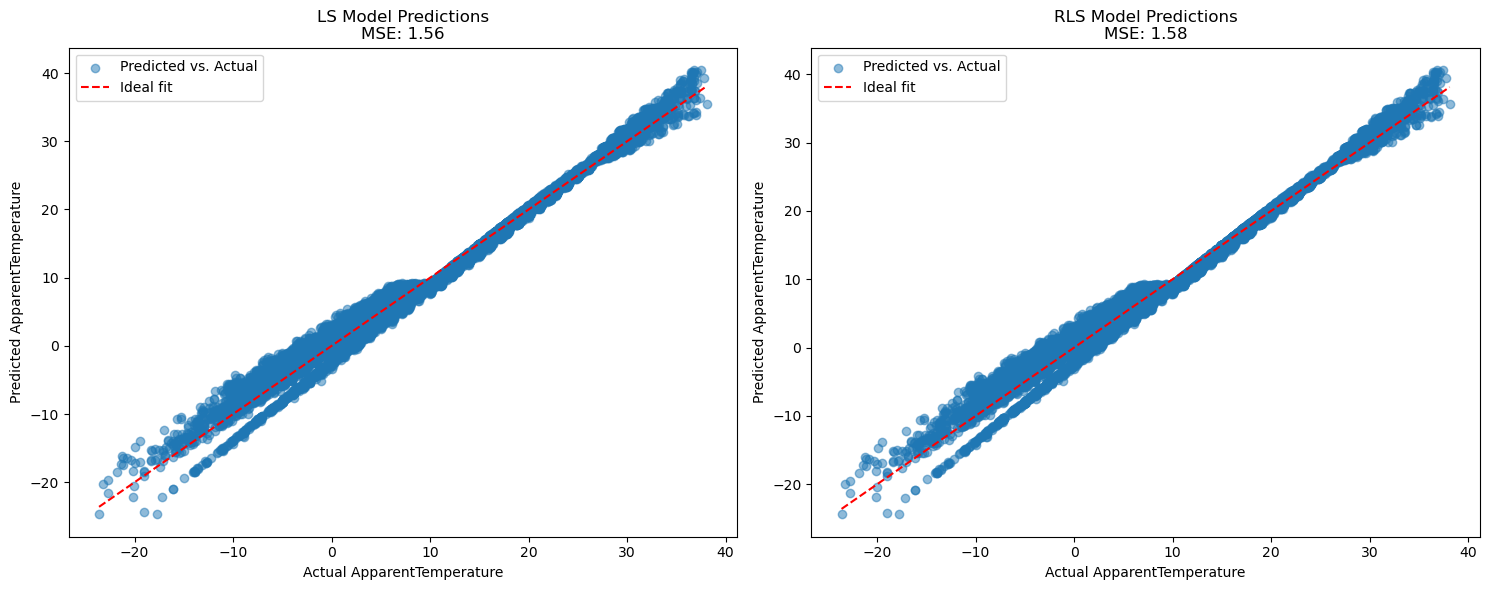

In [30]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# LS model predictions and error
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ls, alpha=0.5, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal fit')
plt.title(f'LS Model Predictions\nMSE: {ls_error:.2f}')
plt.xlabel('Actual ApparentTemperature')
plt.ylabel('Predicted ApparentTemperature')
plt.legend()

# RLS model predictions and error
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rls, alpha=0.5, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal fit')
plt.title(f'RLS Model Predictions\nMSE: {rls_error:.2f}')
plt.xlabel('Actual ApparentTemperature')
plt.ylabel('Predicted ApparentTemperature')
plt.legend()

plt.tight_layout()
plt.show()


## Q3.3

1.5628869994142462


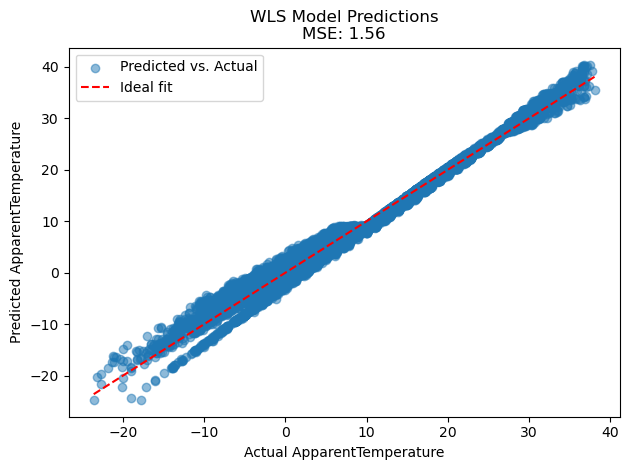

In [38]:
# Assuming w is a vector of weights for the observations in X_train
# You should adjust the weights according to your specific case
w = np.ones(X_train.shape[0])  # example: uniform weights, replace with actual weights if available

# Linear Regression using Weighted Least Squares (WLS) without creating a full W matrix
# Modify the computation to avoid MemoryError
W_X_train_bias = X_train_bias * w[:, np.newaxis]  # Apply weights directly to the data
theta_wls = np.linalg.inv(W_X_train_bias.T @ X_train_bias) @ W_X_train_bias.T @ (y_train * w)

# Predict on the test set using WLS
y_pred_wls = X_test_bias @ theta_wls

# Compute the error for WLS
wls_error = mean_squared_error(y_test, y_pred_wls)

# Display the WLS error
print(wls_error)
plt.scatter(y_test, y_pred_wls, alpha=0.5, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal fit')
plt.title(f'WLS Model Predictions\nMSE: {wls_error:.2f}')
plt.xlabel('Actual ApparentTemperature')
plt.ylabel('Predicted ApparentTemperature')
plt.legend()

plt.tight_layout()
plt.show()

